<img src="pds_banner.png" style="height:200px">


# Laboratorio 3 Procesamiento de señales 2019-2

# Análisis de series de tiempo y sistemas LTI

## Universidad de Antioquia

## 1. Análisis de series de Tiempo

En este laboratorio se trabajará con dos tipos de señales diferentes, con el fin de analizar el comportamiento de  sistemas LTI en el análisis de series de tiempo diferentes: (1) se usará la tasa representativa del mercado (TRM), y (2) se usará una señal obtenida de pluviometros (sensores de lluvias) ubicados en el sur del Amazonas.

### Análisis de señales económicas

La primer aseñal corresponde a los datos contenidos en el archivo ```PrecioDolar.txt```, los cuales son datos obtenidos del banco de la república: http://www.banrep.gov.co/es/trm.

Este archivo contiene el valor día a día de la tasa de cambio representativa del mercado (TRM), es decir, la cantidad de pesos colombianos (COP) por un dólar de los Estados Unidos (USD). Los valores van desde el primero de enero de 1992 hasta diciembre 11 de 2019, el día 345 del año.

El archivo contiene cuatro columnas:
(1) Año, desde 1991 hasta 2019, ej. 1996,

(2) Mes, desde 1 hasta 12, ej. 5 corresponde al mes de Mayo,

(3) Día, desde 1 hasta 28, 29, 30 o 31 de acuerdo al mes,

(4) TRM, en COP.

Para cargar este archivo a una matriz podemos utilizar el siguiente comando:

```data = np.loadtxt('PrecioDolar.txt')```


---
### Análisis de señales climáticas

La segunda señal corresponde a datos de un pluviometro que mide la cantidad diaria de lluvia en una región del sur del amazonas desde 1978 hasta 2011. El archivo ```data_precipitacion.txt``` contiene 3 columnas con la siguiente información:

Día, desde 1 hasta 365, de acuerdo al día de cada año.

Año, desde 1978 hasta 2011.

Valor de la precipitación (en mm de precipitación).

Para cargar este archivo a una matriz podemos utilizar el siguiente comando:

```data = np.loadtxt('data_precipitacion.txt', delimiter=',')```

### imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Lectura de las señales

In [27]:
data_dolar = np.loadtxt('PrecioDolar.txt') # TRM
data_lluvia = np.loadtxt('data_precipitacion.txt', delimiter =',')

<span style="color:red">¿Cuál es el periodo de muestreo para estas señales?.  Expréselo en días y años</span>

Extraiga cada una de las columnas descritas anteriormente a un vector.

In [28]:
day_dolar=data_dolar[:,0] # primera columna del archivo
month_dolar=data_dolar[:,1] # segunda columna del archivo
year_dolar=data_dolar[:,2] # tercera columna del archivo
senal_dolar=data_dolar[:,3] # cuarta columna del archivo

day_lluvia=data_lluvia[:,0] # primera columna del archivo
year_lluvia=data_lluvia[:,1]# segunda columna del archivo
senal_lluvia=data_lluvia[:,2]# tercera columna del archivo

Ts=1./365


<span style="color:red">Grafique la señal en función del tiempo y presente un análisis sobre la misma</span>

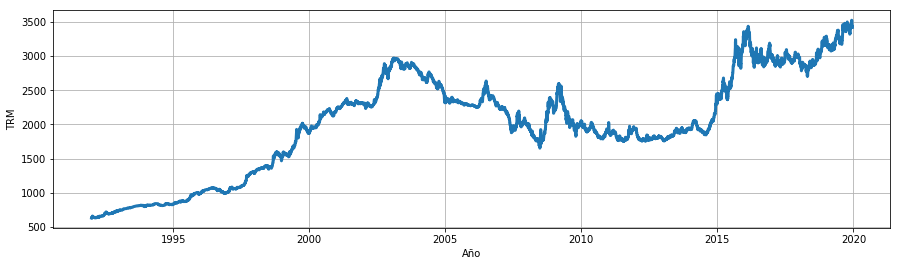

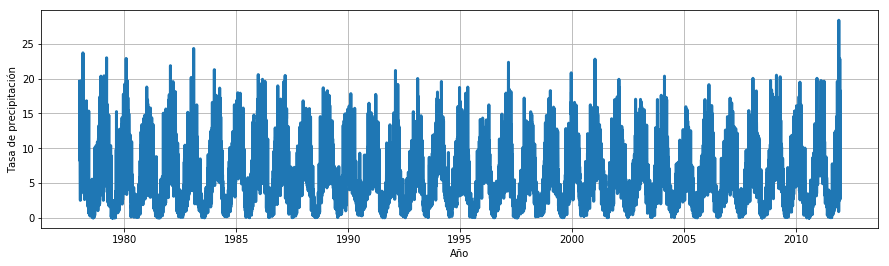

In [12]:
t_dolar=np.arange (1992,  2019+345* Ts+7*Ts , Ts)
t_lluvia=np.arange(1978, 2012, Ts)

plt.figure(figsize=(15,4))
plt.plot(t_dolar, senal_dolar, linewidth=3)
plt.xlabel("Año")
plt.ylabel("TRM")
plt.grid()


plt.figure(figsize=(15,4))
plt.plot(t_lluvia, senal_lluvia, linewidth=3)
plt.xlabel("Año")
plt.ylabel("Tasa de precipitación")
plt.grid()

plt.show()

<span style="color:red">Realice un histograma de la señal previa, y analice el resultado de la gráfica.</span>

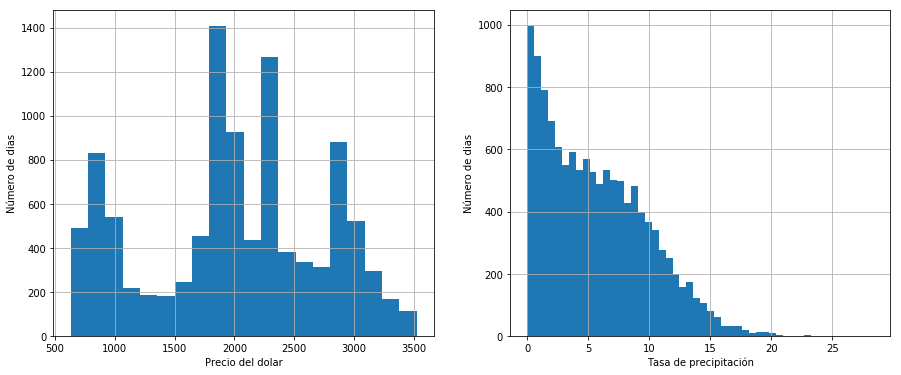

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(senal_dolar, bins=20)
plt.xlabel("Precio del dolar")
plt.ylabel("Número de dias")
plt.grid()
plt.subplot(1,2,2)
plt.hist(senal_lluvia, bins=50)
plt.xlabel("Tasa de precipitación")
plt.ylabel("Número de dias")
plt.grid()
plt.show()


<span style="color:red">Extraiga, grafique y analice brevemente el comportamiento de la lluvia en el amazonas en el año en que usted nació.</span>

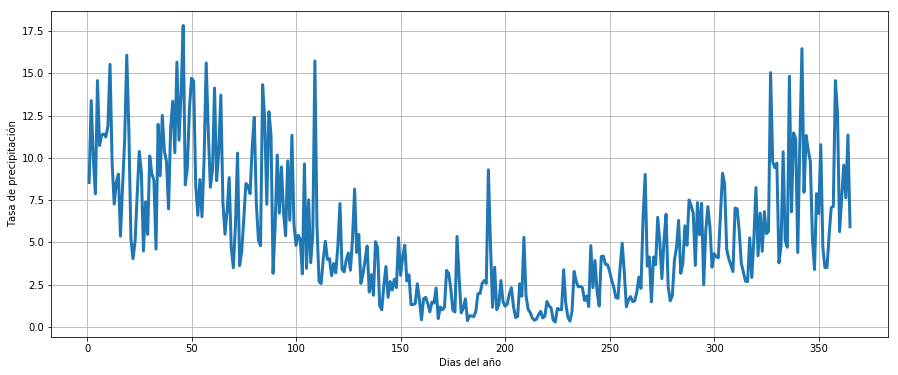

In [14]:
lluvia1990=senal_lluvia[np.where(year_lluvia==1990 )]
tiempo1990=day_lluvia[np.where(year_lluvia==1990 )]


plt.figure(figsize=(15,6))
plt.plot(tiempo1990, lluvia1990, linewidth=3)
plt.xlabel("Dias del año")
plt.ylabel("Tasa de precipitación")
plt.grid()

<span style="color:red">Extraiga, grafique y analice la señal del dolar en el año 2001.</span>

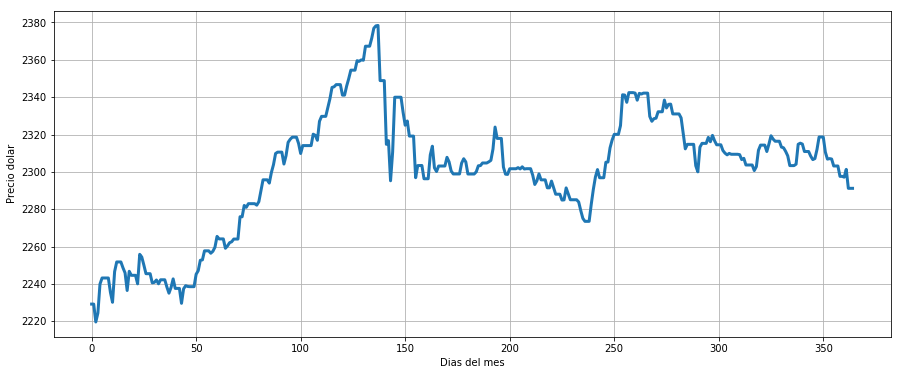

In [16]:
dolar_2001=senal_dolar[np.where(year_dolar==2001)]
t_2001=np.arange(len(dolar_2001))
plt.figure(figsize=(15,6))
plt.plot(t_2001, dolar_2001, linewidth=3)
plt.xlabel("Dias del mes")
plt.ylabel("Precio dolar")
plt.grid()

## 1. Filtro de media móvil (MA)



En muchos casos es útil eliminar ruido aleatorio de alta frecuencia para suavizar la señal de interés y observar el comportamiento más general de la señal. El [filtro de media móvil (MA)](https://es.wikipedia.org/wiki/Media_m%C3%B3vil) es un filtro que permite realizar este proceso. En este caso se utilizará para suavizar las señales.

[Mas información: media movil en trading (leer)](https://admiralmarkets.es/education/articles/forex-indicators/media-movil-simple)

Este filtro tiene la siguiente ecuación en diferencias:

$$ y[n]=\frac{1}{L}\sum_{i=0}^{L-1}x[n-i]$$

Donde $L$ es el número de puntos usados (orden del filtro), $x[n]$ es la señal de entrada y $y[n]$ es la señal de salida.

Para generar los coeficientes de un filtro de media móvil con $L$ variable, se utiliza la instrucción 

```
coefs=np.ones(L)/float(L)
```


Este filtro tiene función de transferencia:
$$H(z)=\frac{1}{L}\sum_{i=0}^{L-1}z^{-i} =\frac{1}{L}\cdot \frac{1-z^{-L}}{1-z^{-1}} = \frac{1}{L}\cdot \frac{z^L-1}{z^{L-1}(z-1)}$$

Para representar el denominador y el numerador y la respuesta se usan las siguientes instrucciones.

```
num=np.zeros(L)
num[0]=1.0/L
num[-1]=-1.0/L
den=np.zeros(L)
den[0]=1
den[1]=-1
```

Los ceros están determinados por las raíces de la ecuación $z^L -1 = 0$, es decir, $z^L=1$. Las raíces se pueden encontrar con base en que $e^{j2\pi k}=1$ para cualquier $k$ entero. Las raíces serán:

$$z_k=e^{j2\pi k /L}$$

### Procedimiento


Diseñe un filtro de media móvil con diferentes valores de $L$, 

Calcule la respuesta de las señales ante dicho filtro y grafique la señal resultante (se puede utilizar el vector de tiempos generado anteriormente). ¿Con cual considera que se visualiza y se podría analizar mejor la información? 

Para calcular la salida se usa la convolución:


```senal_smooth=np.convolve(senal, coefs, mode='same')```


In [43]:
L=100
coefs=np.ones(L)/float(L)
print("Coeficientes del filtro", coefs)


Coeficientes del filtro [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01]


In [44]:
senal_lluvia_smooth=np.convolve(senal_lluvia, coefs, mode='same')
senal_dolar_smooth =np.convolve(senal_dolar, coefs, mode='same')

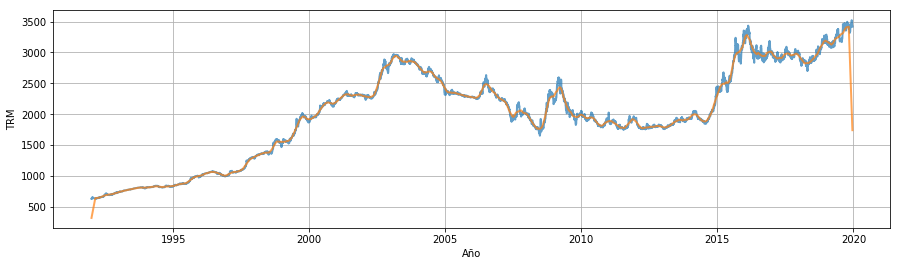

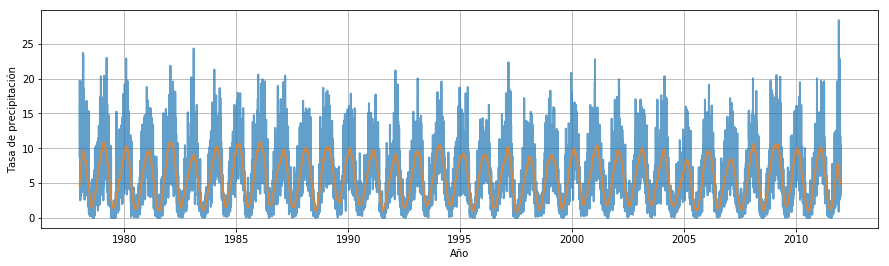

In [45]:
plt.figure(figsize=(15,4))
plt.plot(t_dolar, senal_dolar, linewidth=2, label="señal sin filtrar", alpha=0.7)
plt.plot(t_dolar, senal_dolar_smooth, linewidth=2, label="señal filtrada", alpha=0.7)
plt.xlabel("Año")
plt.ylabel("TRM")
plt.grid()

plt.figure(figsize=(15,4))
plt.plot(t_lluvia, senal_lluvia, linewidth=2, label="señal sin filtrar", alpha=0.7)
plt.plot(t_lluvia, senal_lluvia_smooth, linewidth=2, label="señal sin filtrar", alpha=0.7)
plt.xlabel("Año")
plt.ylabel("Tasa de precipitación")
plt.grid()

plt.show()

<span style="color:red">Diseñe y calcule la señal de salida para filtros de un mes ($L=30$), un trimestre ($L=90$) y un año ($L=365$). Grafique las señales resultantes. ¿Con cual considera que se visualiza y se podría analizar mejor la información?</span>
    

Importe las funciones del archivo ```ztrans.py``` incluido con esta guía (asegúrese de ubicarlo en la misma carpeta del Notebook), las cuales calculan la respuesta en frecuencia, respuesta al escalón, y al impulso

In [20]:
from ztrans import impz, mfreqz

<span style="color:red">Utilice la función ```impz``` para graficar y analizar la respuesta al impulso y al escalón del filtro de media móvil. ¿Qué me indica la respuesta al impulso? Hágalo para $L=7$ y $L=30$</span>

In [21]:
L=30
num=np.zeros(L)
num[0]=1.0/L
num[-1]=-1.0/L
den=np.zeros(L)
den[0]=1
den[1]=-1
print("numerador",num)
print("denominador",den)


numerador [ 0.03333333  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.03333333]
denominador [ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


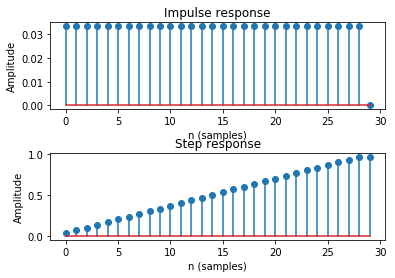

In [22]:
impz(num,den)

Utilice la función ```mfreqz``` para graficar y analizar la respuesta en frecuencia del filtro de media móvil. 

<span style="color:red">¿Qué tipo de filtro es?<span>

<span style="color:red">¿Cómo es su respuesta en fase? <span>

<span style="color:red">Compare los resultados con $L=7$ y $L=30$. <span>

/home/camilo/anaconda3/lib/python3.6/site-packages/scipy/signal/filter_design.py:446: RuntimeWarning: invalid value encountered in true_divide
  npp_polyval(zm1, a, tensor=False))
/home/camilo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


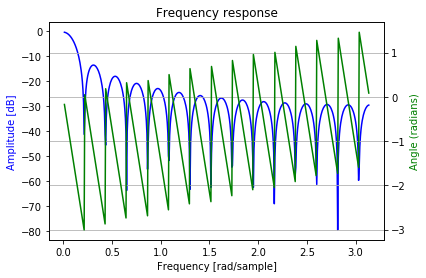

In [23]:
mfreqz(num,den)

### 2. Filtro de primera diferencia

En muchos casos es útil analizar la tasa de cambio de alguna variable. Para una señal continua se utiliza la derivada. En el caso de señales en tiempo discreto se utiliza el filtro de primera diferencia, el cual tiene como ecuación en diferencias:


$$y[n]=x[n]-x[n-1]$$


Los coeficientes de este filtro se pueden generar con la siguiente instrucción: ```difcoefs=[1, -1]```

Y su función de transferencia es:

$$H(z)=1-z^{-1} = \frac{z-1}{z}$$

Para representar el denominador y el numerador de esta función de transferencia se utilizan las siguinetes instrucciones

```
num=[1, -1]
den=[1, 0]
```


<span style="color:red"> Mediante la función de convolución utilizada anteriormente, calcule la derivada de la señal con el filtro de primera diferencia, grafique y analice brevemente la señal resultante. ¿Qué me indica esta señal? </span>




In [24]:
difcoefs=[1, -1]

In [25]:
senal_lluvia_diff=np.convolve(senal_lluvia, difcoefs, mode='same')
senal_dolar_diff=np.convolve(senal_dolar, difcoefs, mode='same')

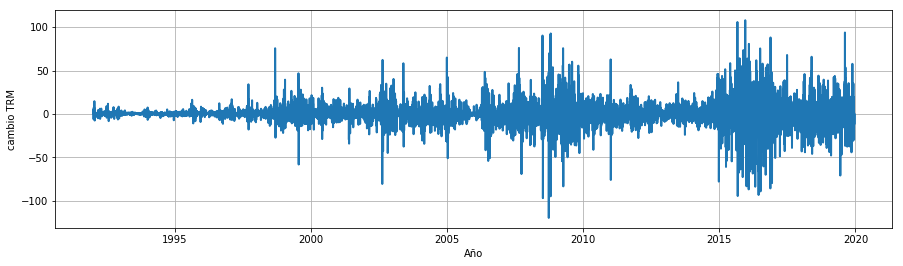

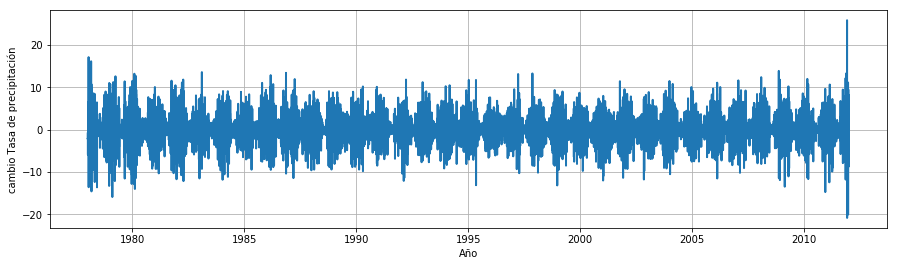

In [26]:
plt.figure(figsize=(15,4))
plt.plot(t_dolar[1:], senal_dolar_diff[1:], linewidth=2)
plt.xlabel("Año")
plt.ylabel("cambio TRM")
plt.grid()

plt.figure(figsize=(15,4))
plt.plot(t_lluvia[1:], senal_lluvia_diff[1:], linewidth=2)
plt.xlabel("Año")
plt.ylabel("cambio Tasa de precipitación")
plt.grid()

plt.show()

<span style="color:red"> Utilice la función ```impz``` para graficar y analizar la respuesta al impulso y al escalón del filtro de primera diferencia. ¿Qué me indica la respuesta al impulso? </span>

<span style="color:red"> Utilice la función ```mfreq``` para graficar y analizar la respuesta en frecuencia del filtro de primera diferencia. ¿Qué tipo de filtro es? ¿Cómo es la respuesta de fase? </span>


<span style="color:red"> Aplique un filtro de media movil (MA) con diferentes ordenes a las señales de las derivadas obtenidas anterioremente, grafiquelas y concluya al respecto. </span>